In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Trading-features.csv')
df

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55456903,42753.6,2023-12-27 10:00:09.874616,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9996,55456902,42753.6,2023-12-27 10:00:08.803069,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9997,55456901,42753.6,2023-12-27 10:00:07.957261,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9998,55456900,42753.7,2023-12-27 10:00:06.730827,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,...,440.3,-41.2,440.3,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3


In [3]:
# Create a new column 'Price_Status' and initialize with 0
df['Price_Status'] = 0

# Condition for price decrease
decrease_condition = df['last_price'] < df['last_price'].shift(1)
df.loc[decrease_condition, 'Price_Status'] = 1

# Condition for price increase
increase_condition = df['last_price'] > df['last_price'].shift(1)
df.loc[increase_condition, 'Price_Status'] = 2

In [4]:
df['Price_Status'].value_counts()

Price_Status
0    3765
2    3223
1    3012
Name: count, dtype: int64

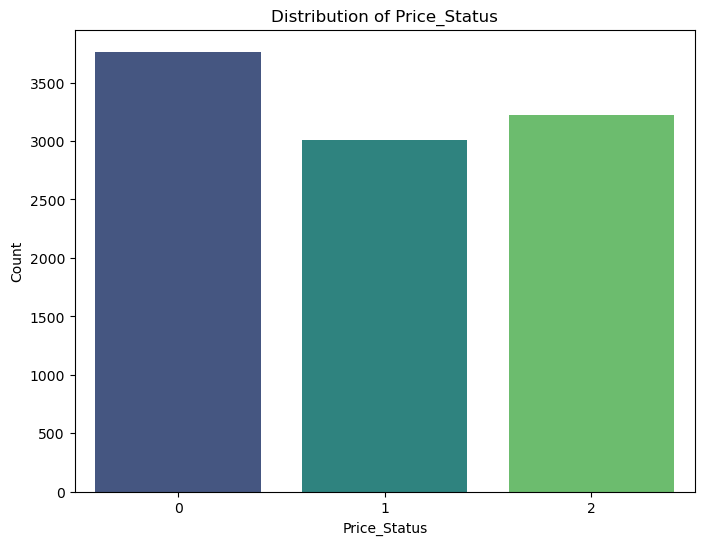

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a column 'Price_Status' in your DataFrame

# Plot the count of each Price_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Price_Status', data=df, palette='viridis')
plt.title('Distribution of Price_Status')
plt.xlabel('Price_Status')
plt.ylabel('Count')
plt.show()

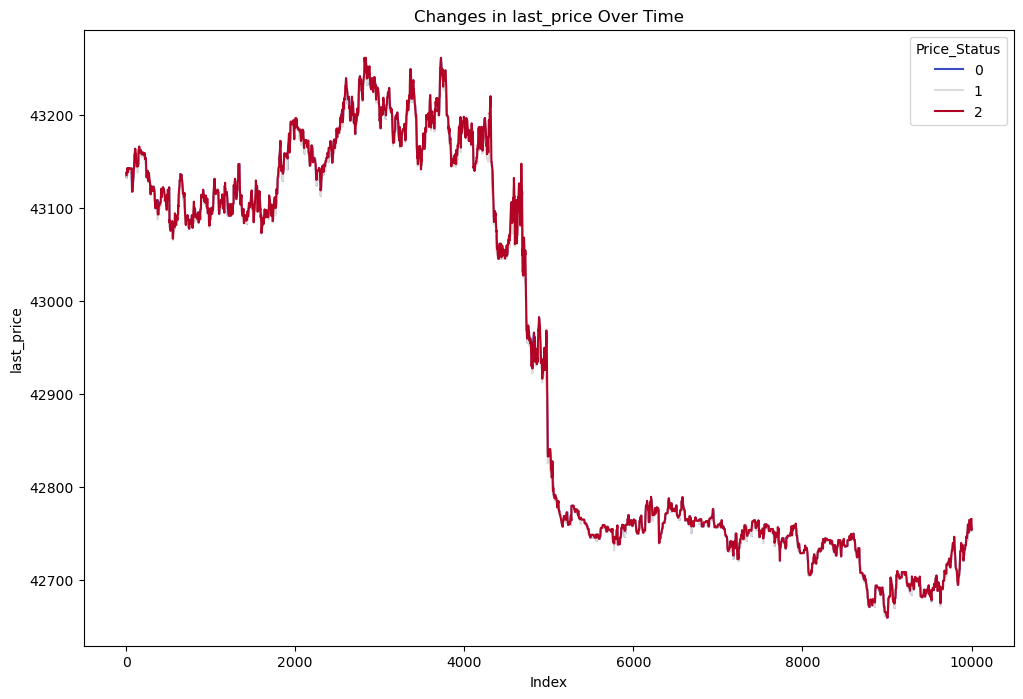

In [6]:
# Plot the changes in last_price over time, colored by Price_Status
plt.figure(figsize=(12, 8))
sns.lineplot(x=df.index, y='last_price', hue='Price_Status', data=df, palette='coolwarm')
plt.title('Changes in last_price Over Time')
plt.xlabel('Index')
plt.ylabel('last_price')
plt.show()

In [7]:
df = df.dropna(axis=0)
df.shape

(9979, 165)

In [8]:
df1 = df.copy()

In [9]:
df1 = df1.drop(['id', 'last_price', 'created_at', 'Price_Status'], axis=1)
df1

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9996,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9997,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9998,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0,...,440.3,-41.2,440.3,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3


In [10]:
x = df1.iloc[:,:]
x

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9996,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9997,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5,...,440.2,-41.3,440.2,-41.3,-41.3,440.2,440.2,-41.3,-41.3,440.2
9998,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0,...,440.3,-41.2,440.3,-41.2,-41.2,440.3,440.3,-41.2,-41.2,440.3


In [11]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    2
9999    2
Name: Price_Status, Length: 9979, dtype: int64

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [13]:
# Initialize the SVM model
from sklearn.svm import SVC
classifier = SVC()

In [14]:
# Train the model
classifier.fit(X_train, y_train)

SVC()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
# Evaluate the mode
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy = accuracy_score(y_test, y_pred)
accuracy = classifier.score(X_test,y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.43


In [17]:
# Get the column indices for columns f11 to f161
start_index = df.columns.get_loc('f11')
end_index = df.columns.get_loc('f161') + 1  # Adding 1 to include the 'f161' column

# Drop the columns in the specified range
df = df.drop(df.columns[start_index:end_index], axis=1)

In [18]:
df.head()

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Price_Status
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,0
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,0
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,0
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,0
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,1


In [19]:
df.tail(10)

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Price_Status
9990,55456908,42765.2,2023-12-27 10:00:14.965252,0.000414,25186,-36.7,42.8,6.1,10.0,20.0,22.9,2.3,1.0,2
9991,55456907,42763.5,2023-12-27 10:00:13.915119,0.000414,25187,-36.3,44.7,8.4,8.5,18.6,20.5,0.7,1.6,1
9992,55456906,42762.0,2023-12-27 10:00:12.881137,0.000414,25188,-36.3,42.3,6.0,6.1,16.1,16.0,-11.1,-0.9,1
9993,55456905,42759.6,2023-12-27 10:00:11.844657,0.000414,25189,-36.3,40.7,4.4,7.5,14.6,14.3,-17.2,-2.5,1
9994,55456904,42758.0,2023-12-27 10:00:10.994427,0.000414,25190,-29.5,29.4,-0.1,3.1,9.5,9.7,-23.7,-5.6,1
9995,55456903,42753.6,2023-12-27 10:00:09.874616,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5,1
9996,55456902,42753.6,2023-12-27 10:00:08.803069,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6,0
9997,55456901,42753.6,2023-12-27 10:00:07.957261,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5,0
9998,55456900,42753.7,2023-12-27 10:00:06.730827,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0,2
9999,55456899,42765.6,2023-12-27 10:00:05.707968,0.000414,25196,-36.7,48.5,11.8,22.7,19.8,21.7,-7.3,7.4,2


In [20]:
df.drop('id',axis=1,inplace=True)
df

,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Price_Status
0,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,0
1,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,0
2,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,0
3,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,0
4,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42753.6,2023-12-27 10:00:09.874616,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5,1
9996,42753.6,2023-12-27 10:00:08.803069,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6,0
9997,42753.6,2023-12-27 10:00:07.957261,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5,0
9998,42753.7,2023-12-27 10:00:06.730827,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0,2


In [21]:
df.shape

(9979, 13)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(9979, 13)

In [24]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

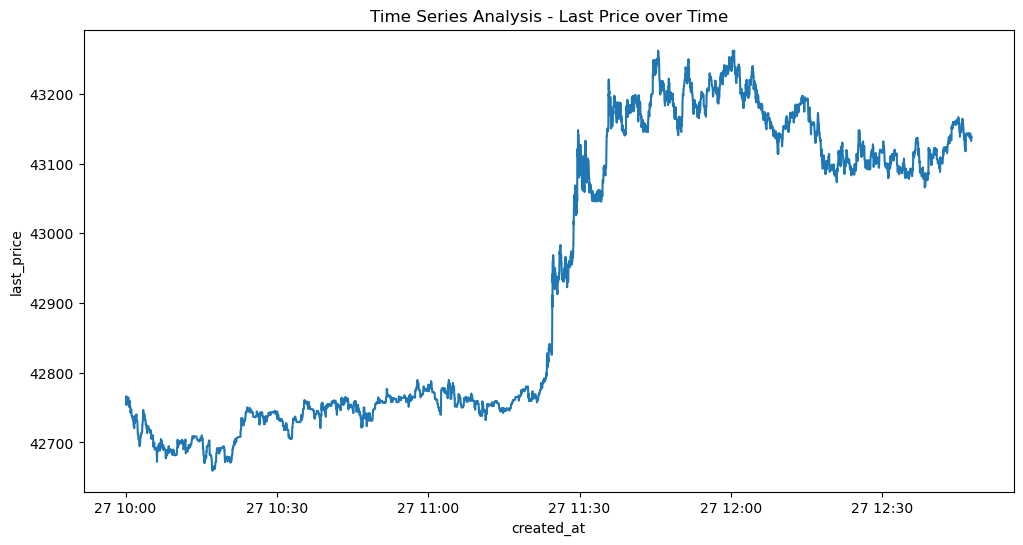

In [25]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='last_price', data=df)
plt.title('Time Series Analysis - Last Price over Time')
plt.show()

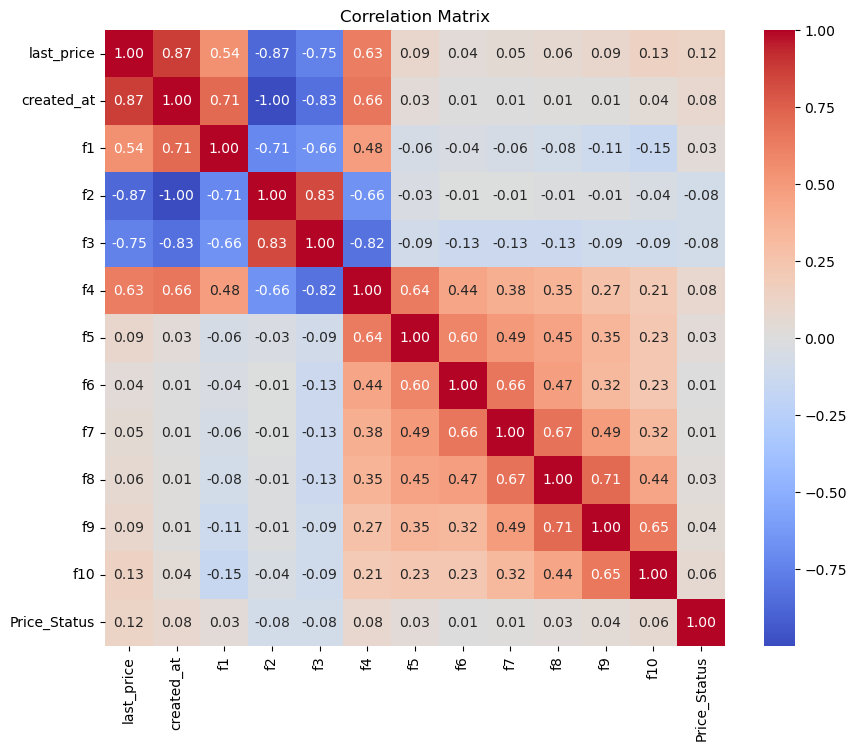

In [26]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\Hamza Bhatti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


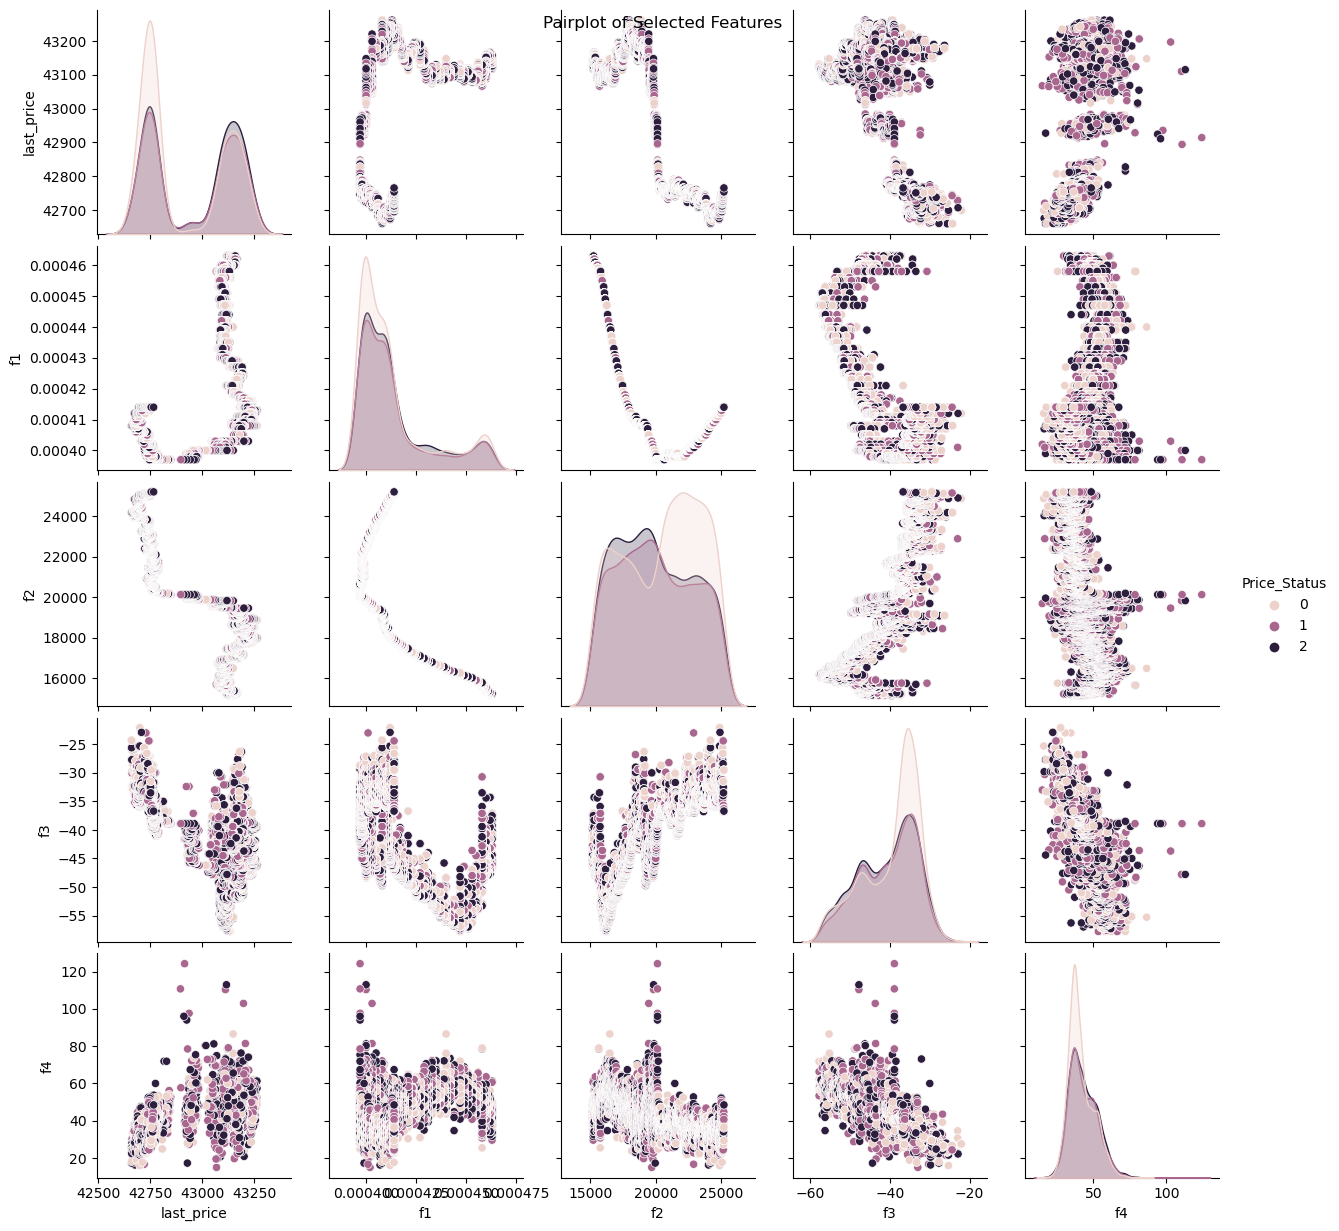

In [27]:
# Pairplot for selected features
selected_features = ['last_price', 'f1', 'f2', 'f3', 'f4', 'Price_Status']
sns.pairplot(df[selected_features], hue='Price_Status', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

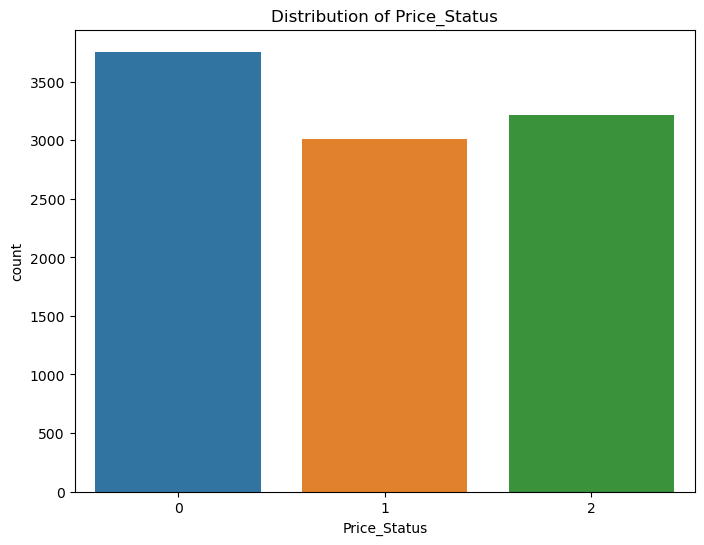

In [28]:
# Distribution of Price_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Price_Status', data=df)
plt.title('Distribution of Price_Status')
plt.show()

In [29]:
df.columns

Index(['last_price', 'created_at', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Price_Status'],
      dtype='object')

In [30]:
df['Price_Status'].value_counts()

Price_Status
0    3756
2    3215
1    3008
Name: count, dtype: int64

In [31]:
df = df.drop(['created_at'],axis=1)
df

,last_price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Price_Status
0,43138.2,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8,0
1,43138.2,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7,0
2,43138.2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7,0
3,43138.2,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8,0
4,43132.6,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42753.6,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5,1
9996,42753.6,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6,0
9997,42753.6,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5,0
9998,42753.7,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0,2


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define features and target variable
X = df[['last_price','f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]
y = df['Price_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the SVM model
model = SVC()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.43
Confusion Matrix:
[[571  56 127]
 [353  96 129]
 [382  99 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.76      0.55       754
           1       0.38      0.17      0.23       578
           2       0.42      0.28      0.33       664

    accuracy                           0.43      1996
   macro avg       0.41      0.40      0.37      1996
weighted avg       0.41      0.43      0.39      1996



In [33]:
X = df.drop('Price_Status',axis='columns')
X

,last_price,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,43138.2,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,-4.3,-15.2,4.8
1,43138.2,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,-2.4,-15.2,4.7
2,43138.2,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,-2.4,-6.7,4.7
3,43138.2,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,-10.2,-12.3,-0.8
4,43132.6,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,-10.2,-12.4,-0.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,42753.6,0.000414,25191,-29.5,29.4,-0.1,3.5,9.6,9.7,-23.7,-5.5
9996,42753.6,0.000414,25192,-29.5,29.4,-0.1,3.4,9.6,9.7,-21.5,-5.6
9997,42753.6,0.000414,25193,-36.7,36.6,-0.1,3.7,9.7,12.6,-21.4,-5.5
9998,42753.7,0.000414,25194,-36.7,48.5,11.8,22.6,21.6,23.7,-9.6,3.0


In [34]:
y = df['Price_Status']
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    2
9999    2
Name: Price_Status, Length: 9979, dtype: int64

In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [36]:
# Initialize the SVM model
from sklearn.svm import SVC
classifier = SVC()

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       760
           1       0.00      0.00      0.00       615
           2       0.00      0.00      0.00       621

    accuracy                           0.38      1996
   macro avg       0.13      0.33      0.18      1996
weighted avg       0.14      0.38      0.21      1996



C:\Users\Hamza Bhatti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza Bhatti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hamza Bhatti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

# Assume df is your DataFrame with columns including 'last_price' and 'Price_Status'

# Step 1: Preprocessing
# Encode 'Price_Status' using LabelEncoder
label_encoder = LabelEncoder()
df['Price_Status'] = label_encoder.fit_transform(df['Price_Status'])

# Split the data into features (X) and target variable (y)
X = df[['last_price']]  # Add other features if needed
y = df['Price_Status']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the Deep Learning Model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 output classes, use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 4: Evaluate the Model
# Step 4: Evaluate the Model
y_pred = np.argmax(model.predict(X_test), axis=-1)
class_names = list(map(str, label_encoder.classes_))  # Convert class names to strings
print(classification_report(y_test, y_pred, target_names=class_names))

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0889 - accuracy: 0.3879 - val_loss: 1.0924 - val_accuracy: 0.3932
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0860 - accuracy: 0.3992 - val_loss: 1.0927 - val_accuracy: 0.3982
Epoch 3/10
200/200 [==============================] - 1s 2ms/step - loss: 1.0872 - accuracy: 0.3987 - val_loss: 1.0891 - val_accuracy: 0.3982
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0854 - accuracy: 0.4010 - val_loss: 1.0885 - val_accuracy: 0.3914
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0849 - accuracy: 0.3971 - val_loss: 1.0884 - val_accuracy: 0.3982
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0843 - accuracy: 0.4010 - val_loss: 1.0873 - val_accuracy: 0.3970
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0843 - accuracy: 0.4017 - val_loss: 1.0868 - val_accuracy: 0.3976
Epoch 

In [ ]:
# pip install tensorflow